<a href="https://colab.research.google.com/github/yurikr/Food101/blob/master/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.vision import *

In [6]:
path = untar_data(URLs.FOOD)

In [13]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/labels.txt'),
 PosixPath('/root/.fastai/data/food-101/classes.txt'),
 PosixPath('/root/.fastai/data/food-101/train.txt'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/train.json'),
 PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/h5')]

In [14]:
path_img = path.joinpath('images')

In [15]:
path_img.ls()


[PosixPath('/root/.fastai/data/food-101/images/foie_gras'),
 PosixPath('/root/.fastai/data/food-101/images/caesar_salad'),
 PosixPath('/root/.fastai/data/food-101/images/cannoli'),
 PosixPath('/root/.fastai/data/food-101/images/fish_and_chips'),
 PosixPath('/root/.fastai/data/food-101/images/clam_chowder'),
 PosixPath('/root/.fastai/data/food-101/images/chocolate_cake'),
 PosixPath('/root/.fastai/data/food-101/images/french_onion_soup'),
 PosixPath('/root/.fastai/data/food-101/images/risotto'),
 PosixPath('/root/.fastai/data/food-101/images/frozen_yogurt'),
 PosixPath('/root/.fastai/data/food-101/images/lobster_bisque'),
 PosixPath('/root/.fastai/data/food-101/images/poutine'),
 PosixPath('/root/.fastai/data/food-101/images/oysters'),
 PosixPath('/root/.fastai/data/food-101/images/churros'),
 PosixPath('/root/.fastai/data/food-101/images/red_velvet_cake'),
 PosixPath('/root/.fastai/data/food-101/images/beet_salad'),
 PosixPath('/root/.fastai/data/food-101/images/omelette'),
 PosixPath(

In [16]:
 folders = [x for x in path_img.iterdir() if x.is_dir()] 
 labels = [x.stem for x in folders]
 labels[:2]

['foie_gras', 'caesar_salad']

In [24]:
sorted(labels)

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [82]:
with open(path.joinpath('labels.txt')) as f:
    metadata_labels = f.read().splitlines()

with open(path.joinpath('classes.txt')) as f:
    classes = f.read().splitlines()

with open(path.joinpath('train.txt')) as f:
    train_text_fnames = f.read().splitlines()

with open(path.joinpath('test.txt')) as f:
    test_text_fnames = f.read().splitlines()

fn_paths = [list(x.glob('*.jpg')) for x in folders]

metadata_labels = sorted([l.lower().replace(" ", "_") for l in metadata_labels])



In [103]:
# Check that labels match metadata
A = sorted(labels)
C = sorted(classes)
B = metadata_labels

set(B)-set(A), set(C) - set(A), len(B)

(set(), set(), 101)

In [84]:
train_text_fnames[0], test_text_fnames[0], metadata_labels[0]

('apple_pie/1005649', 'apple_pie/1011328', 'apple_pie')

In [106]:
str(path_img.joinpath(train_text_fnames[0] + ".jpg")), p.name, metadata_labels[0], True

('/root/.fastai/data/food-101/images/apple_pie/1005649.jpg',
 '1005649.jpg',
 'apple_pie',
 True)

In [162]:
from collections import namedtuple

def get_df_from_files(files_path, is_valid):

  Record = namedtuple('Record', ['full_path', 'category', 'is_valid'])

  records = [Record(str(path_img.joinpath(f + ".jpg")), f.split('/')[0], is_valid) for f in files_path]

  return pd.DataFrame(records, columns=Record._fields)

train_df = get_df_from_files(train_text_fnames, True)
test_df = get_df_from_files(test_text_fnames, False)

# Concatenate train and test sets
image_df = pd.concat([train_df, test_df])

In [163]:
len(test_df), len(train_df), train_df.columns, train_df.head()

(25250,
 75750,
 Index(['full_path', 'category', 'is_valid'], dtype='object'),
                                            full_path   category  is_valid
 0  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie      True
 1  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie      True
 2  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie      True
 3  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie      True
 4  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie      True)

In [164]:
# Loading image to a ImageList from path in DataFrame
split_and_labeled_images = (ImageList.from_df(
    image_df, 
    '..',
    cols='full_path',    
))

# Split image into train and validation set based on the is_valid column
split_and_labeled_images = split_and_labeled_images.split_from_df(col='is_valid')

# Label images based on category column
split_and_labeled_images = split_and_labeled_images.label_from_df(cols='category')

print(split_and_labeled_images)

LabelLists;

Train: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 382),Image (3, 342, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Valid: LabelList (75750 items)
x: ImageList
Image (3, 512, 308),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Test: None


In [169]:
image_batch_size = 64
transform_image_size = (256, 256)

# Define transforms used for data augmentation
# By default, only horizontal flip is used, not vertical flip
# Disable default lighting alteration, and use brightness and constrast for finer control
image_transforms = get_transforms(
    max_rotate=10,
    max_zoom=1.1,
    max_lighting=None,
    max_warp=0.2,
    xtra_tfms=[
        brightness(change=(0.5-0.2, 0.5+0.2), p=0.75),
        contrast(scale=(1-0.4, 1+0.2), p=0.75),
        squish(scale=(1-0.3, 1+0.5), p=0.75),
        skew(direction=(0, 7), magnitude=random.randint(0,6)/10, p=0.75),
    ]
)

image_data_bunch = (
    split_and_labeled_images.transform(
        image_transforms, 
        size=transform_image_size, 
        resize_method=ResizeMethod.SQUISH)
    .databunch(bs=image_batch_size)
    .normalize(imagenet_stats)
)





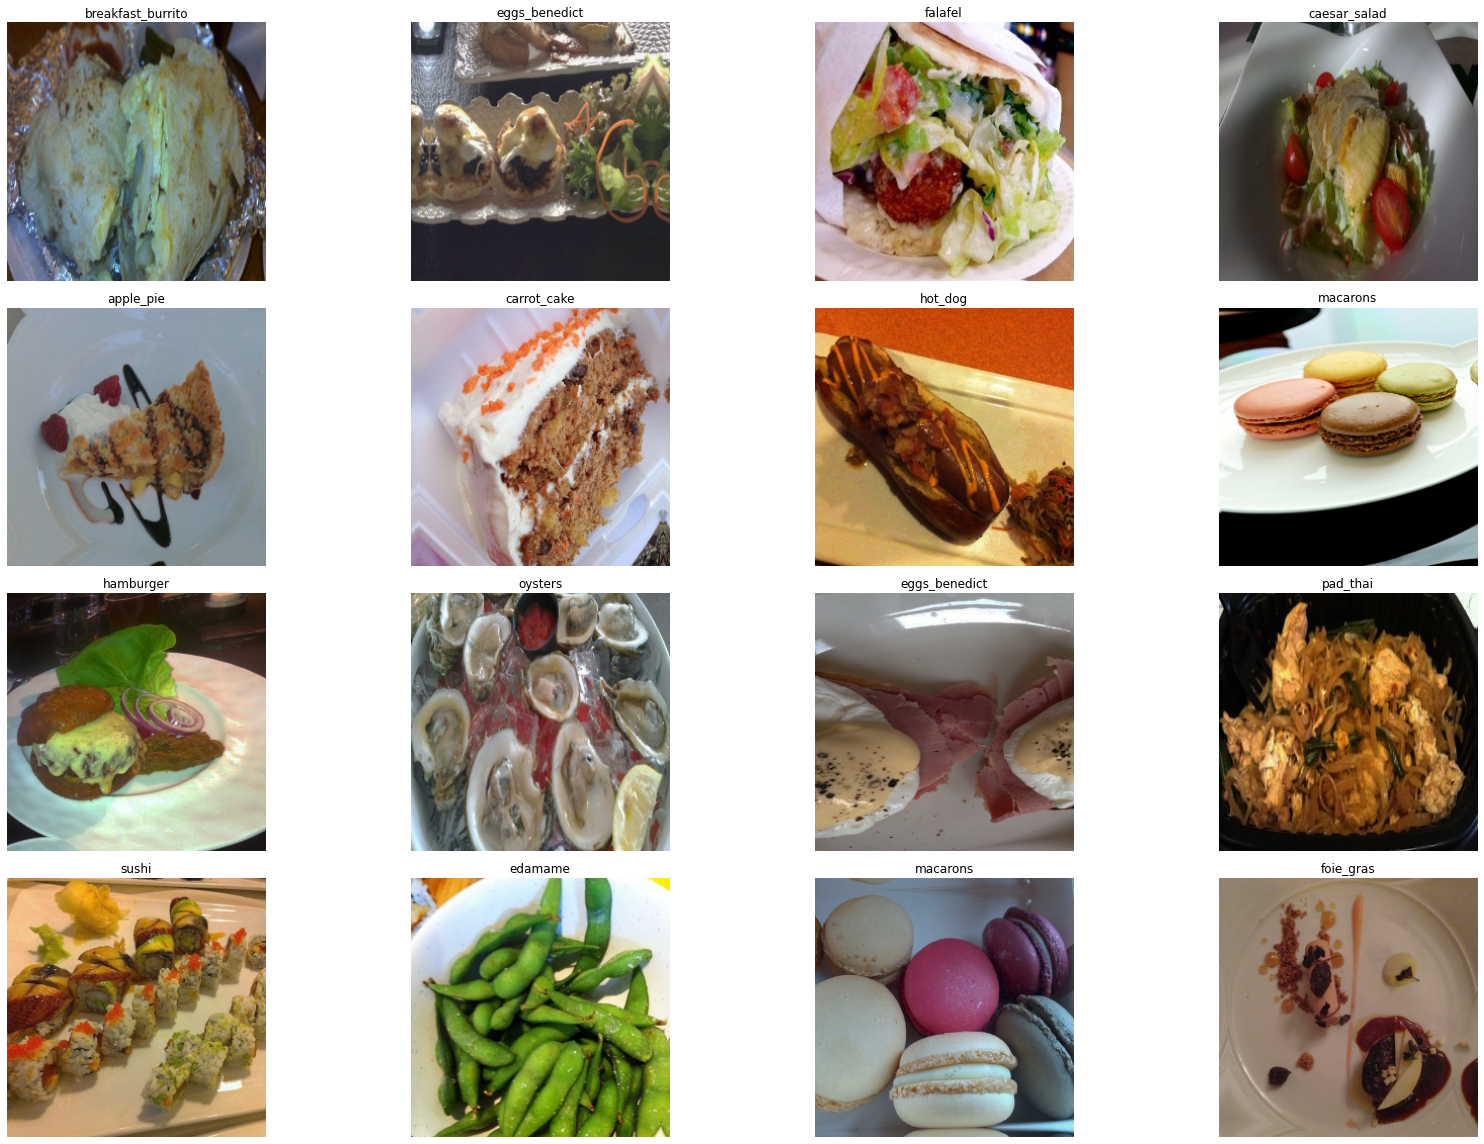

In [170]:
# Visualize some images, with transforms applied randonmly
image_data_bunch.show_batch(rows=4, figsize=(24,16))

In [171]:
image_learner = cnn_learner(
    image_data_bunch,
    models.resnet50,
    metrics=accuracy,
    wd=1e-1,
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
image_learner.lr_find()
image_learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
